# Simulating Pansperima in a Planetary System as a Series of Poisson Processes
This notebook constitutes the code for my final project. The project I chose was the simulating panspermia project. The code is broken up into 5 different sections below. I hope you enjoy!

## Part 1 - Analytically Evaluating the Probability of Abiogenesis Occuring in Time T
To start off, I calculate the probability that abiogenesis (life starting naturally) occurs on a given planet during a given time frame, T.

Import the necessary python packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Then establish initial model parameters:

In [2]:
T = 10**10 #T is the total time span of the planet in which life has to start. This is set to 10 billion years
tau = (10**9) #tau is the mean time it takes for life to start - 1 billion years

Calculate the probability that life occurs given mean time tau and time frame T. Assuming that abiogenesis can be modeled by a poisson process:

In [3]:
## The probability of at least 1 occurence is 1-P(0):
p = 1- np.exp((-1 * T)/ tau)

In [4]:
p

0.9999546000702375

Assuming that life takes on average 1 billion years to occur, it is almost certain that life will get started on a planet over the course of a 10 billion year period... let's graph this as a function of time t:

In [5]:
#create an array to hold time t (for the x axis)
ts = []
for t in range(10000000):
    ts.append(t)

#create an array to hold the probability of life having started by time t
ps = []
for t in ts:
    #calculate probability of life at time t*1000 (so that max time is 10 billion years)
    ps.append(1- np.exp((-1 * (t*1000))/ tau))

Then, plot the graph and see what it looks like!

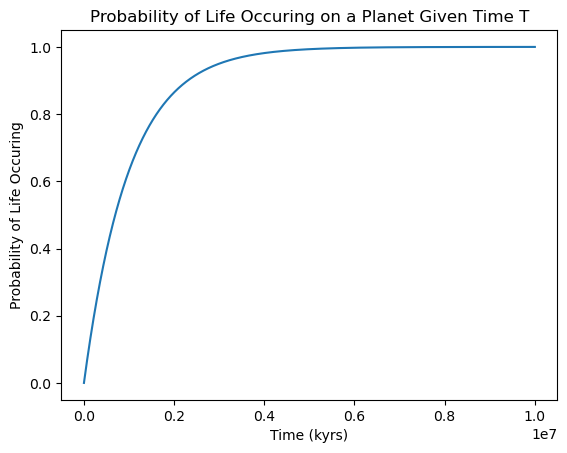

In [6]:
#time on x axis, probability on the y axis
plt.plot(ts,ps)
plt.xlabel("Time (kyrs)")
plt.ylabel("Probability of Life Occuring")
plt.title("Probability of Life Occuring on a Planet Given Time T")
plt.show()

It is clear that when T = 10 billion and tau = 1 billion, life is expected to get started on a planet.

Let's plot several graphs for several values of tau:

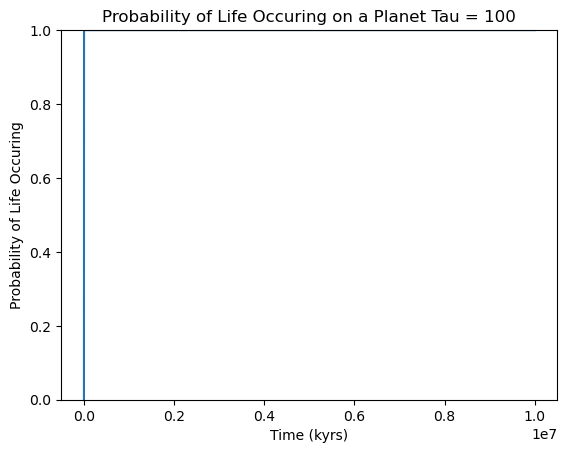

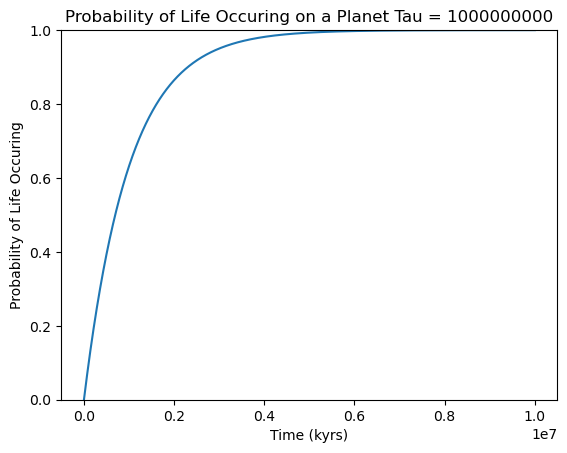

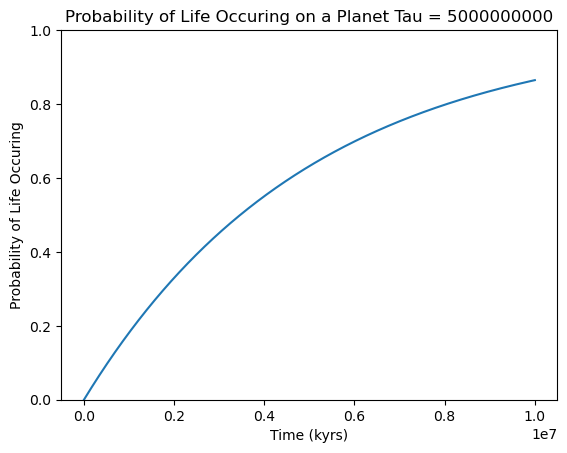

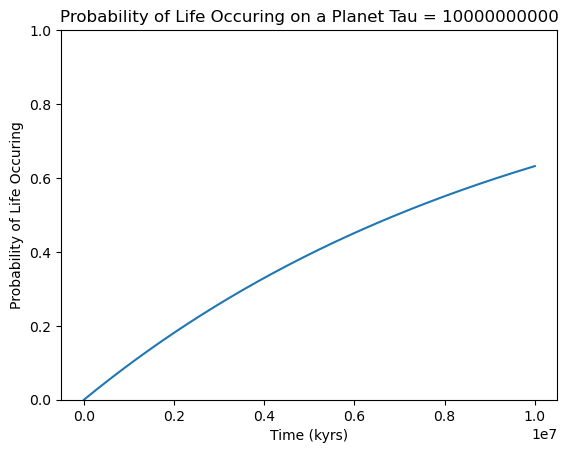

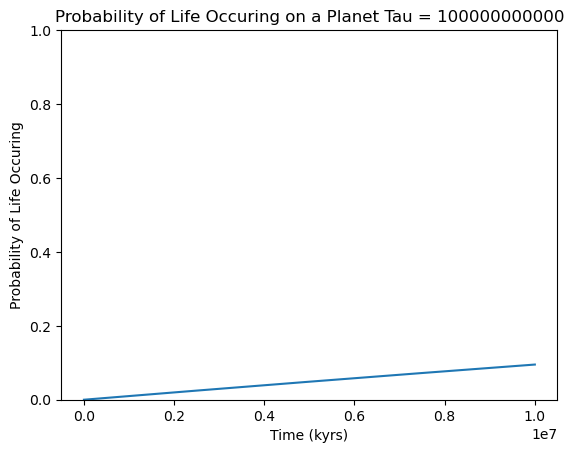

In [7]:
tau_list = [100,1000000000,5000000000,10000000000,100000000000]

for tau in tau_list:
    ts = []
    for t in range(10000000):
        ts.append(t)

    #create an array to hold the probability of life having started by time t
    ps = []
    for t in ts:
        #calculate probability of life at time t*1000 (so that max time is 10 billion years)
        ps.append(1- np.exp((-1 * (t*1000))/ tau))
    
    plt.plot(ts,ps)
    plt.xlabel("Time (kyrs)")
    plt.ylim(0,1)
    plt.ylabel("Probability of Life Occuring")
    plt.title(f"Probability of Life Occuring on a Planet Tau = {tau}")
    plt.show()

# Part 2: Simulation over Time
In this next part, I develop a simulation for abiogenesis over the course of a planet's history.
The planet's timeline, T, is split into N segments. Then, the probability of life occuring at each segment in its history is calculated.

First define a function to calculate the probability of life starting in a given time period T. This is again calculated as a poisson process.

In [8]:
def get_prob(tau, T):
    return 1 - np.exp((-1 * T)/ tau)

Then, define a function to run a simulation over the course of the planet's entire time frame T

In [9]:
def run_sim(T,N,tau): #Total time, Number of Segments, Mean Time To Start
    k = T/N #k is the timeframe for each division
    abiogenesis_chain = [] #instatiate an array to keep track of life occurences
    
    #Start time t = 0
    t = 0
    
    #Iterate through the timeframe and get the probability for each segment k
    while t < T:
        #Calculate the probabily of life occuring
        p = get_prob(tau, k)
        
        #Conduct Bernoulli Experiment
        q = random.random()
        if q < p:
            abiogenesis_chain.append(1)
        else:
            abiogenesis_chain.append(0)
        
        t += k

    #Create a boolean to determine if life occured on the planet or not
    life_happened = False
    if sum(abiogenesis_chain) > 0:
        life_happened = True
    
    
    return life_happened, abiogenesis_chain

Finally, run the simulation for a planet:

In [10]:
#Set the parameters for the simulation
T = 10**10 
tau = (10**9)
N = 100
life, a_chain = run_sim(T,N,tau)

Next, define a way to visualize the simulation!

In [11]:
def visualize_sim(a_chain,display):
    #Define empty arrays to visualize the planet's history
    p_hist = []
    planet_history = np.zeros([1,N,3])
    abiogenesis_occurences = np.zeros([1,N,3])
    
    #Iterate through the a_chain to populate the ndarrays
    i = 0
    life_happened = False
    for a in a_chain:
        #If life occured, set life happened to true
        if a == 1:
            if life_happened == False:
                life_happened = True
            #Populate visualization array
            abiogenesis_occurences[0,i,:] = np.array([0.58,0.96,0.4])  
        else:
            abiogenesis_occurences[0,i,:] = np.array([0.96,0.4,0.4])
        
        #Populate life_happened array
        if life_happened:
            planet_history[0,i,:] = np.array([0.58,0.96,0.4])
            p_hist.append(1)
        else:
            planet_history[0,i,:] = np.array([0.96,0.4,0.4])
            p_hist.append(0)
        i += 1
    
    #Print the visualization!
    if display:
        print(f"Simulation for T = {T}, N = {N}, Tau = {tau}\n")

        print("Abiogenesis?")
        plt.axis('OFF')
        plt.imshow(abiogenesis_occurences)
        plt.show()

        print("History So Far:")
        plt.axis('OFF')
        plt.imshow(planet_history)
        plt.show()
    
    return abiogenesis_occurences, planet_history, p_hist

With the planet visualization function defined, we can visualize the planet's abiogenesis history as an ndarray:

In [12]:
a_occ, p_hist_vis, p_hist = visualize_sim(a_chain,True)

Simulation for T = 10000000000, N = 100, Tau = 1000000000

Abiogenesis?


History So Far:


For the Abiogenesis plot, the green squares indicate a time period where abiogenesis occured.
For the History So Far plot, the green squares indicate the time period that life is on the planet.

Then, define a function to calculate the % of time a planet becomes inhabited by time T given a tau: 

In [13]:
def run_multiple(T,N,tau,n):
    #Instantiate variable to keep track of the percentage of simulations where life starts
    percent_life = 0
    
    #Iterate n times for the simulation
    for i in range(n):
        life, a_chain = run_sim(T,N,tau)
        #print(life)
        if life:
            percent_life += 1
    
    #Return the average
    percent_life /= n
    return percent_life

Now run the simulation multiple times to get the percentage of times the planet becomes inhabited.

In [14]:
T = 10**10 
tau = (10**9)
N = 100
n = 1000000 #lessen this to make it run faster
percent_life = run_multiple(T,N,tau,n)
print(f"Percentage of Life For Tau = {tau}:")
print(percent_life)

Percentage of Life For Tau = 1000000000:
0.999952


The simulation's result is incredibly accurate compared to the analytic formula.
0.999955 ~ 0.9999546000702375

Next, I check the percentage of life occuring for a variety of different values for Tau:

In [15]:
#Define a list of different taus to test
tau_list = [100,1000000000,5000000000,10000000000,100000000000]

#Iterate through the tau list and runt he simulation to calculate the percentage of times abiogenesis occurs
T = 10**10 
N = 100
n = 100000
for tau in tau_list:
    percent_life = run_multiple(T,N,tau,n)
    print(f"Percentage of Life For Tau = {tau}:")
    print(percent_life)

Percentage of Life For Tau = 100:
1.0
Percentage of Life For Tau = 1000000000:
0.99996
Percentage of Life For Tau = 5000000000:
0.86543
Percentage of Life For Tau = 10000000000:
0.63488
Percentage of Life For Tau = 100000000000:
0.09394


Finally, compare these values to the values from the analytic formula:

In [16]:
tau_list = [100,1000000000,5000000000,10000000000,100000000000]

#Iterate through the tau list and runt he simulation to calculate the percentage of times abiogenesis occurs
T = 10**10 
for tau in tau_list:
    percent_life = 1- np.exp((-1 * T)/ tau)
    print(f"Percentage of Life For Tau = {tau}:")
    print(percent_life)

Percentage of Life For Tau = 100:
1.0
Percentage of Life For Tau = 1000000000:
0.9999546000702375
Percentage of Life For Tau = 5000000000:
0.8646647167633873
Percentage of Life For Tau = 10000000000:
0.6321205588285577
Percentage of Life For Tau = 100000000000:
0.09516258196404048


The percentages are quite similar from the analytic calculations compared to the simulated probabilities!

# Part 3: Tracking the Life of A System of N>1 Planets
In this part, I run the simulation, this time including multiple planets. This simulation also keeps track of the life history for the entire system in addition to the life history for the individual planets.

In [17]:
def sim_system(T,N,tau,n_planets,display):
    system_life = False 
    A = False
    W = 0
    
    system_history = np.zeros((n_planets,N))
    system_abiogenesis = np.zeros((n_planets,N))
    
    #Set baseline for earliest start date, outside the range of the simulation
    earliest_life_occurence = 1000
    
    #Iterate for n planets in the system, run the simulation for each planet
    for i in range(n_planets):
        
        if display:
            print(f"Planet {i+1}:")
        #Run simulation and visualize
        life, a_chain = run_sim(T,N,tau)
        a_occ, p_his_vis, p_hist = visualize_sim(a_chain,display)
        
        system_history[i] = np.array(p_hist)
        system_abiogenesis[i] = np.array(a_chain)
        
        #Determine if the system has life
        if life:
            W += 1
            system_life = True
        
        #Iterate through the abiogenesis chain for the planet to check the system's life history
        i = 0
        for a in a_chain:
            if a == 1:
                if i < earliest_life_occurence:
                    earliest_life_occurence = i
            i += 1
    
    #Then visualize the history of the system
    system_visualization = np.zeros([1,N,3])
    for i in range(100):
        if i >= earliest_life_occurence:
            system_visualization[0,i,:] = np.array([0.58,0.96,0.4])
        else:
            system_visualization[0,i,:] = np.array([0.96,0.4,0.4])
    
    if W == n_planets:
        A = True
    
    #Return system_life boolean and the visualization array
    return system_life, system_visualization, system_history, system_abiogenesis, system_life, W, A

Now I can run the simulation with some new values of T and tau:

In [18]:
T = 10**10 
tau = (10**9)
N = 100
n_planets = 2
system_life, visualization, system_history, system_abiogenesis, S, W, A = sim_system(T,N,tau,n_planets,True)

print("System History:")
plt.axis('OFF')
plt.imshow(visualization)
plt.show()

Planet 1:
Simulation for T = 10000000000, N = 100, Tau = 1000000000

Abiogenesis?


History So Far:


Planet 2:
Simulation for T = 10000000000, N = 100, Tau = 1000000000

Abiogenesis?


History So Far:


System History:


Now, the system's history is can be properly modeled!

# Part 4  - System Simulation With Panspermia
In this part, I simulate a system with multiple planets while also including panspermia to populate the planets with life as well.

Panspermia is modeled by a separate, independent poisson process with its own value for tau (which I have decided to call pau). In the next function, I define a process for simulating panspermia occurences for a planet. 

For clarity, when panspermia occurs, this indicates that a chunk broke off of that planet and will go populate another planet.

This function is essentially just rehashing the previously defined simulation function:

In [19]:
def run_psim(T,N,pau):
    k = T/N #k is the timeframe for each division
    panspermia_chain = [] #instatiate an array to keep track of panspermia occurences
    
    #Start time t = 0
    t = 0
    
    #Iterate through the timeframe and get the probability for each segment k
    while t < T:
        #Calculate the probabily of life occuring
        p = get_prob(pau, k)
        
        #Conduct Bernoulli Experiment
        q = random.random()
        if q < p:
            panspermia_chain.append(1)
        else:
            panspermia_chain.append(0)
        
        t += k
        
    return panspermia_chain

Then, define a function to simulate an entire system while including panspermia. There are a few parts to this simulation, layed out by the following step:
1. Simulate abiogenesis occurences for the entire system
2. Run panspermia simulation for each planet in the system - only do so if the planet has life
3. Visualize the System's History!

It is important to note the following features of this simulation:
1. Panspermia will only occur inwards. That is, planets cannot affect planets of higher orbits

In [20]:
def sim_panspermia_system(T,N,tau,pau,n_planets,display):
    if n_planets <= 1:
        print("Simulation Error: Please define a system with n>= 2 planets")
        return
    else:
        #1 - Simulate Abiogenesis Occurences for the Entire System
        system_life, visualization, system_hist, system_abiogenesis, a,b,c = sim_system(T,N,tau,n_planets,display)
        
        #The system_hist array has the life_history of each planet in the system
        system_panspermia = np.zeros((n_planets,N))
        
        #2 - Run panspermia simulation for each planet in the system!
        for i in range(n_planets):
            #Exclude inner-most planet
            if i != 0:
                p_chain = run_psim(T,N,pau)
                system_panspermia[i] = np.array(p_chain)
            else:
                system_panspermia[i] = np.zeros((1,N))
            
        #Then, visualize the panspermia occurences per planet:
        #print(system_panspermia)
        if display:
            print("-------------------------------------------------------------")
            visualize_panspermia_occurences(system_panspermia,N)
        
        #3 - Now that Panspermia has been modeled, I need to update the system's life history
        i = 0
        for row in system_panspermia:
            #Again, first planet cannot create panspermia (asteroid will go into the star)
            if i != 0:
                j = 0
                for value in row:
                    #Abiogenesis MUST have occured for panspermia to transfer:
                    if value == 1 and system_hist[i,j] == 1:
                        planet = random.randint(0,i-1)
                        #planet # planet receives the asteroid - start life on the planet
                        if j != 99:
                            system_abiogenesis[planet,j+1] = 2
                        
                    j += 1
            i += 1
        
        #Then visualize the life occurences of the planets:
        if display:
            print("-------------------------------------------------------------")
            visualize_life_occurences(system_abiogenesis,N)
        
        #4 - Determine and visualize each planet's history, as well as the history of the system
        
        #Set return variables to initial values
        S = False
        W = 0
        A = False
        
        #Initialize histoy array
        planets_history = np.zeros((n_planets,N))
        i = 0
        
        #Iterate through the system_abiogenesis array
        for row in system_abiogenesis:
            j = 0
            for value in row:
                #If life starts from abiogenesis:
                if value == 1:
                    W += 1
                    
                    #fill in the rest of the history array with green
                    for k in range(j,N):
                        planets_history[i,k] = 1
                    break
                    
                #If life starts from panspermia
                elif value == 2:
                    W += 1
                    
                    #fill in the rest of the history array with purple
                    for k in range(j,N):
                            planets_history[i,k] = 2
                    break
                    
                #If there currently is no life:
                else:
                    planets_history[i,j] = 0
                    
                j += 1
                    
            i += 1
        
        if display:
            print("-------------------------------------------------------------")
            visualize_planets_history(planets_history,N)
        
        #Determine final Simulation Parameters
        if W > 0:
            S = True
        if W == n_planets:
            A = True
            
        return S, W, A

### Defining visualization functions:

Visualize Panspermia Occurences:

In [21]:
def visualize_panspermia_occurences(system_panspermia,N):
    i = 1
    #Iterate through the planets
    for row in system_panspermia:
        print(f"Planet {i} Panspermia Occurences:")
        #Create the visualization array
        panspermia_occurences = np.zeros([1,N,3])
        
        #Fill in the visualization array
        j = 0
        for value in row:
            if value == 1:
                panspermia_occurences[0,j,:] = np.array([0.81,0.52,0.96])
            else:
                panspermia_occurences[0,j,:] = np.array([0.88,0.88,0.88])
            
            j += 1
        
        #Visualize!
        plt.axis('OFF')
        plt.imshow(panspermia_occurences)
        plt.show()
        
        i += 1

Visualize Life Occurences:

In [22]:
def visualize_life_occurences(system_abiogenesis,N):
    i = 1
    #Iterate through the planets
    for row in system_abiogenesis:
        print(f"Planet {i} Life Occurences:")
        #Create the visualization array
        life_occurences = np.zeros([1,N,3])
        
        #Fill in the visualization array
        j = 0
        for value in row:
            if value == 2:
                life_occurences[0,j,:] = np.array([0.81,0.52,0.96])
            elif value == 1:
                life_occurences[0,j,:] = np.array([0.58,0.96,0.4])
            else:
                life_occurences[0,j,:] = np.array([0.96,0.4,0.4])
            
            j += 1
        
        #Visualize!
        plt.axis('OFF')
        plt.imshow(life_occurences)
        plt.show()   
        
        i +=1

Visualize Planets' History:

In [23]:
def visualize_planets_history(planets_history,N):
    i = 1
    #Iterate through the planets
    for row in planets_history:
        print(f"Planet {i} History:")
        #Create the visualization array
        history = np.zeros([1,N,3])
        
        #Fill in the visualization array
        j = 0
        for value in row:
            if value == 2:
                history[0,j,:] = np.array([0.81,0.52,0.96])
            elif value == 1:
                history[0,j,:] = np.array([0.58,0.96,0.4])
            else:
                history[0,j,:] = np.array([0.96,0.4,0.4])
            
            j += 1
        
        #Visualize!
        plt.axis('OFF')
        plt.imshow(history)
        plt.show()   
        
        i +=1

Finally, I run the simulation with some standard parameters!

In [24]:
T = 10**10 
tau = (10**10)
pau = (10**10)
N = 100
n_planets = 10
S,W,A = sim_panspermia_system(T,N,tau,pau,n_planets,True)

Planet 1:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 2:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 3:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 4:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 5:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 6:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 7:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 8:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 9:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


Planet 10:
Simulation for T = 10000000000, N = 100, Tau = 10000000000

Abiogenesis?


History So Far:


-------------------------------------------------------------
Planet 1 Panspermia Occurences:


Planet 2 Panspermia Occurences:


Planet 3 Panspermia Occurences:


Planet 4 Panspermia Occurences:


Planet 5 Panspermia Occurences:


Planet 6 Panspermia Occurences:


Planet 7 Panspermia Occurences:


Planet 8 Panspermia Occurences:


Planet 9 Panspermia Occurences:


Planet 10 Panspermia Occurences:


-------------------------------------------------------------
Planet 1 Life Occurences:


Planet 2 Life Occurences:


Planet 3 Life Occurences:


Planet 4 Life Occurences:


Planet 5 Life Occurences:


Planet 6 Life Occurences:


Planet 7 Life Occurences:


Planet 8 Life Occurences:


Planet 9 Life Occurences:


Planet 10 Life Occurences:


-------------------------------------------------------------
Planet 1 History:


Planet 2 History:


Planet 3 History:


Planet 4 History:


Planet 5 History:


Planet 6 History:


Planet 7 History:


Planet 8 History:


Planet 9 History:


Planet 10 History:


# Part 5 - Modeling Panspermia with Varied Parameters

Create a function to run multiple simulations of a system with panspermia:

In [25]:
def run_final_sim(T,N,tau,pau,n_planets,display,n):
    S_Final = 0
    W_Final = 0
    A_Final = 0
    for i in range(n):
        S,W,A = sim_panspermia_system(T,N,tau,pau,n_planets,display)
        if S:
            S_Final += 1
        if A:
            A_Final += 1
        
        W_Final += W
    
    S_Final /= n
    A_Final /= n
    W_Final /= n*n_planets
    
    return S_Final, W_Final, A_Final

In [26]:
T = 10**10 
tau = (10**11)
pau = (10**10)
N = 100
n_planets = 10

run_final_sim(T,N,tau,pau,n_planets,False,1000)

(0.644, 0.1292, 0.0)

## Slow Abiogenesis, Slow Panspermia

In [27]:
T = 10**10 
tau = (10**11)
pau = (10**11)
N = 100
n_planets = 10

a1 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a1)

(0.62, 0.0984, 0.0)


## Slow Abiogenesis, Medium Panspermia

In [28]:
T = 10**10 
tau = (10**11)
pau = (10**10)
N = 100
n_planets = 10

a2 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a2)

(0.642, 0.1311, 0.0)


## Slow Abiogenesis, Fast Panspermia

In [29]:
T = 10**10 
tau = (10**11)
pau = (10**9)
N = 100
n_planets = 10

a3 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a3)

(0.627, 0.2628, 0.004)


## Medium Abiogenesis, Slow Panspermia

In [30]:
T = 10**10 
tau = (10**10)
pau = (10**11)
N = 100
n_planets = 10

a4 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a4)

(1.0, 0.646, 0.016)


## Medium Abiogenesis, Medium Panspermia

In [31]:
T = 10**10 
tau = (10**10)
pau = (10**10)
N = 100
n_planets = 10

a5 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a5)

(1.0, 0.7204, 0.047)


## Medium Abiogenesis, Fast Panspermia

In [32]:
T = 10**10 
tau = (10**10)
pau = (10**9)
N = 100
n_planets = 10

a6 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a6)

(0.999, 0.8902, 0.399)


## Fast Abiogenesis, Slow Panspermia

In [33]:
T = 10**10 
tau = (10**9)
pau = (10**11)
N = 100
n_planets = 10

a7 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a7)

(1.0, 1.0, 1.0)


## Fast Abiogenesis, Medium Panspermia

In [34]:
T = 10**10 
tau = (10**9)
pau = (10**10)
N = 100
n_planets = 10

a8 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a8)

(1.0, 1.0, 1.0)


## Fast Abiogenesis, Fast Panspermia

In [35]:
T = 10**10 
tau = (10**9)
pau = (10**9)
N = 100
n_planets = 10

a9 = run_final_sim(T,N,tau,pau,n_planets,False,1000)
print(a9)

(1.0, 0.9999, 0.999)


I can display heatmaps for each of the values, (S, W, and A) to track trends better:

In [36]:
li = [a3,a6,a9,a2,a5,a8,a1,a4,a7]

vis_array = np.zeros((3,3,3))
k = 0
for i in range(3):
    for j in range(3):
        vis_array[i,j] = np.array(li[k])
        k += 1
        
img1 = vis_array[:,:,0]
img2 = vis_array[:,:,1]
img3 = vis_array[:,:,2]

print(img1)

[[0.627 0.999 1.   ]
 [0.642 1.    1.   ]
 [0.62  1.    1.   ]]


Display heatmaps:

[[0.627 0.999 1.   ]
 [0.642 1.    1.   ]
 [0.62  1.    1.   ]]
S


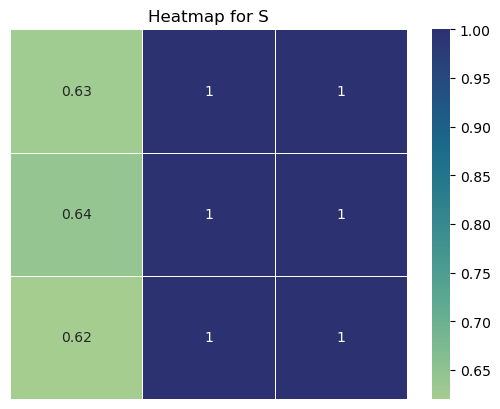

[[0.2628 0.8902 0.9999]
 [0.1311 0.7204 1.    ]
 [0.0984 0.646  1.    ]]
W


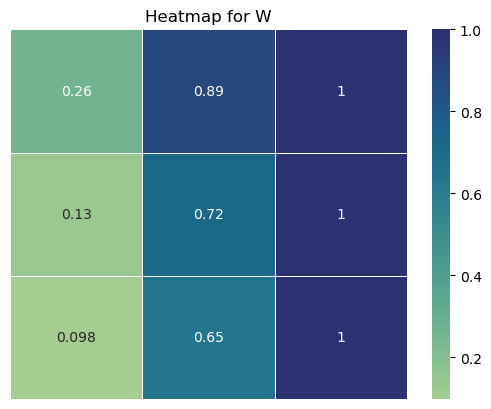

[[0.004 0.399 0.999]
 [0.    0.047 1.   ]
 [0.    0.016 1.   ]]
A


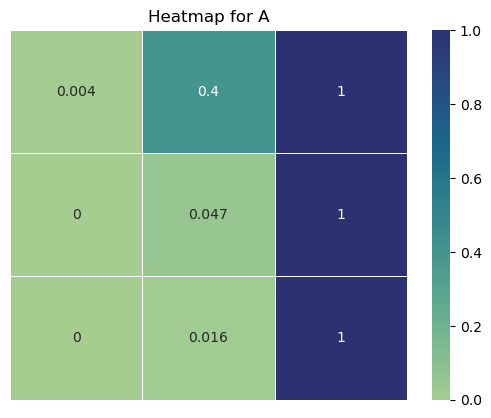

In [37]:
import seaborn as sns
print(img1)
print("S")
ax = sns.heatmap(img1, linewidth = 0.5,  annot = True, cmap="crest")
plt.title("Heatmap for S")
plt.axis('OFF')
plt.show()

print(img2)
print("W")
ax = sns.heatmap(img2, linewidth = 0.5, annot = True, cmap = "crest")
plt.title("Heatmap for W")
plt.axis('OFF')
plt.show()

print(img3)
print("A")
ax = sns.heatmap(img3, linewidth = 0.5,  annot = True, cmap = "crest")
plt.title("Heatmap for A")
plt.axis('OFF')
plt.show()

The heatmaps help display trends in the data better!

# Part 6 - Establishing A Panspermia Signature

The first thing that I want to check is what the values look like for S, W, A when there is no panspermia in the system. 

These values will be checked for a system of 10 planets with slow, medium, and fast abiogeneis with the following functions:

In [38]:
#Define a function to run multiple simulations of an abiogenesis-only system
def msim(T,tau,N,n_planets,n):
    S_Final = 0
    W_Final = 0
    A_Final = 0
    
    #Iterate for n iterations
    for i in range(n):
        system_life, visualization, system_history, system_abiogenesis, S, W, A = sim_system(T,N,tau,n_planets,False)
        if S:
            S_Final += 1
        if A:
            A_Final += 1
        
        W_Final += W
        
        
    S_Final /= n
    A_Final /= n
    W_Final /= n*n_planets
    
    return S_Final, W_Final, A_Final

### Slow Abiogenesis

In [39]:
T = 10**10 
tau = (10**11)
N = 100
n_planets = 10
msim(T,tau,N,n_planets, 1000)

(0.653, 0.0983, 0.0)

### Moderate Abiogenesis

In [40]:
T = 10**10 
tau = (10**10)
N = 100
n_planets = 10
msim(T,tau,N,n_planets, 1000)

(1.0, 0.6328, 0.018)

### Fast Abiogenesis

In [41]:
T = 10**10 
tau = (10**9)
N = 100
n_planets = 10
msim(T,tau,N,n_planets, 1000)

(1.0, 1.0, 1.0)

## Comparison to Panspermia Model

We can see that, when abiogenesis is slow and there is no panspermia, S = 0.653, W = 0.0983 and A = 0.0.

Compared to part 5 in the runs with slow abiogenesis, the W value here is far lower: 0.098 << 0.026. Meanwhile, the S and A values are relatively the same. Since the presence of panspermia has no bearing on S, it only makes sense to look at just W and A. We can therefore define a signature for panspermia as having an incredibly low A value (~ 0) with relatively high W (~20-30 %). This could be a clear indicator that panspermia has occured in a system.

Let's try this again but with very fast panspermia:

In [42]:
T = 10**10 
tau = (10**11)
pau = (10**5)
N = 100
n_planets = 10

run_final_sim(T,N,tau,pau,n_planets,False,10000)

(0.6347, 0.39049, 0.0801)

We see the same trend, this time with even more of the total planets populated, yet still having a very low A value. This indicates that we have found a strong signature for panspermia!

Thanks for a great semester!